# Ensemble Techniques - Project Submission

<b>DOMAIN:</b> Telecom

<b>CONTEXT:</b> A telecom company wants to use their historical customer data and leverage machine learning to predict behaviour in an attempt to retain customers. The end goal is to develop focused customer retention programs.

<b>DATA DESCRIPTION:</b> Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

<b>PROJECT OBJECTIVE:</b> The objective, as a data scientist hired by the telecom company, is to build a model that will help to identify the potential customers who have a higher probability to churn. This will help the company to understand the pain points and patterns of customer churn and will increase the focus on strategising customer retention.

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### <b> 1. Data Understanding and Exploration: </b>

In [2]:
df1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [3]:
df2 = pd.read_csv("TelcomCustomer-Churn_2.csv")
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
merged_data = pd.merge(df1, df2, on='customerID') 
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df1_columns = list(df1.columns)
df1_columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity']

In [6]:
df2_without_customerID = df2.drop('customerID', axis=1)

In [7]:
df2_without_customerID.head()

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df2_columns = list(df2_without_customerID.columns)
df2_columns

['OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [9]:
all_columns = df1_columns + df2_columns
all_columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [10]:
merged_data_columns = list(merged_data.columns)
merged_data_columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [11]:
if merged_data_columns == all_columns:
    print("All columns have been incorporated in the merged DataFrame.")
else:
    print("Some columns are missing from the DataFrame.")

All columns have been incorporated in the merged DataFrame.


### <b> 2. Data Cleaning & Analysis: </b>

In [12]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
merged_data = merged_data.replace(' ',np.nan)

In [14]:
merged_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### There are 11 empty values in the 'TotalCharges' column.

In [15]:
# Check for different unexpected categories in other columns
for col in merged_data.columns:
    value_count = merged_data[col].value_counts()
    print(value_count)

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

In [16]:
# Dropping empty values 
merged_data = merged_data.dropna(axis=0).reset_index()
merged_data.isnull().sum()

index               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We have now imputed all missing/incorrect values in the DataFrame.

In [17]:
# We will first convert the columns with an 'object' datatype into categorical variables 
for feature in merged_data.columns:
    if merged_data[feature].dtype == 'object':
        merged_data[feature] = pd.Categorical(merged_data[feature]) # Replace strings with an integer
    
merged_data.dtypes

index                  int64
customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges        category
Churn               category
dtype: object

In [18]:
merged_data['SeniorCitizen'] = pd.Categorical(merged_data.SeniorCitizen)
merged_data.dtypes

index                  int64
customerID          category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges        category
Churn               category
dtype: object

In [19]:
# Changing the datatype of 'TotalCharges' to float
merged_data.TotalCharges = merged_data.TotalCharges.astype(float)
merged_data.dtypes

index                  int64
customerID          category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [20]:
df_without_id = merged_data.drop(columns='customerID', axis=1).copy()

In [21]:
def pie_charts(df_without_id):
    categorical_features = df_without_id.select_dtypes(include=['category']).columns
    num_features = len(categorical_features)
    num_rows = (num_features + 1) // 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(8, 6 * num_rows))
    axes = axes.ravel()
    
    for i, feature in enumerate(categorical_features):
        value_counts = df_without_id[feature].value_counts().sort_values(ascending=False)
        axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
        axes[i].set_title(feature)

    # Hide unused subplots
    for j in range(num_features, num_rows * 2):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

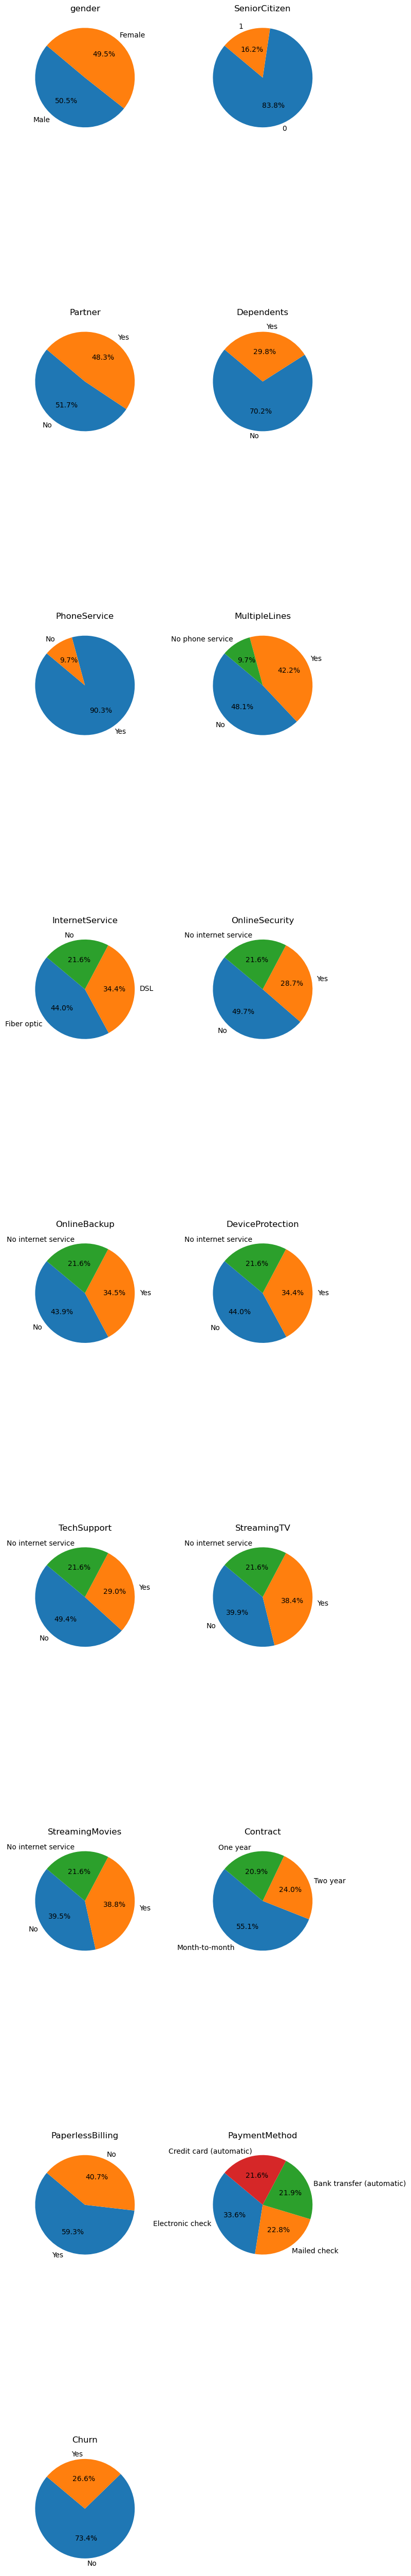

In [22]:
pie_charts(df_without_id)

1. **Gender Breakdown:** The dataset shows a balanced representation of both men and women.
2. **Senior Citizens:** The dataset includes a relatively lower proportion of elderly individuals.
3. **Partner Status:** The data reflects a similar distribution of people with and without partners, but is just slightly higher for people without partners.
4. **Dependents:** A significant portion of the population does not have any dependents.
5. **Phone Service:** A high percentage (90%) of individuals have phone service.
6. **Multiple Lines:** Among those with phone service, over two-fifths (42%) have multiple lines.
7. **Internet Usage:** Nearly half (44%) of the population utilizes fiber optic internet.
8. **Online Security:** A substantial share (50%) of the population has online security measures in place.
9. **Online Backup:** Almost half (44%) of the individuals lack an online backup solution.
10. **Device Protection:** A similar proportion (44%) of the population doesn't have device protection.
11. **Tech Support:** Half (50%) of the population forgoes tech support services.
12. **TV Streaming:** The number of people who stream TV is nearly on par with those who don't.
13. **Movie Streaming:** There's a close to even split between those who stream movies and those who don't.
14. **Contract Preference:** The majority (55%) favor a month-to-month contract for their services.
15. **Billing Preference:** Most people (maximum) opt for paperless billing.
16. **Payment Methods:** Electronic checks are a moderately popular payment option (33%), with other methods showing similar usage.
17. **Customer Churn:** A large majority (73%) of the population remained loyal customers (did not churn). 

In [23]:
df = merged_data
df.head()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
# Dropping 'index' and 'customerID' as they won't need to be encoded with categorical features
merged_data.drop(columns=['index', 'customerID'], inplace=True)
merged_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
X = df.drop(columns=['Churn'])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [26]:
# Encode categorical variables using Get Dummies method
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [27]:
y = df['Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: category
Categories (2, object): ['No', 'Yes']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=.20, random_state=10)
X_train.shape, X_test.shape

((5625, 30), (1407, 30))

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns =X_train.columns)
X_train_scaled.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.297499,0.861739,-0.978569,0.980109,-0.443918,-0.967979,1.516285,0.326876,-0.326876,-0.858594,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,-0.561404,0.822862,-0.531223,1.414779,-0.541665
1,-0.521791,0.840135,-0.233205,0.980109,-0.443918,1.033080,1.516285,0.326876,-0.326876,-0.858594,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,-0.561404,0.822862,-0.531223,1.414779,-0.541665
2,1.560372,1.072790,2.036780,0.980109,-0.443918,1.033080,1.516285,0.326876,-0.326876,1.164695,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,1.781249,0.822862,-0.531223,1.414779,-0.541665
3,1.356239,-1.178976,-0.141853,0.980109,-0.443918,-0.967979,-0.659507,-3.059267,3.059267,-0.858594,...,-0.525166,-0.794595,-0.525166,-0.801159,1.947129,-0.561404,-1.215271,1.882450,-0.706824,-0.541665
4,-0.399311,0.870048,-0.046720,-1.020295,-0.443918,1.033080,1.516285,0.326876,-0.326876,1.164695,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,1.781249,0.822862,1.882450,-0.706824,-0.541665


In [30]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test_scaled.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.072697,-1.478104,-0.736393,0.980109,-0.443918,-0.967979,-0.659507,0.326876,-0.326876,-0.858594,...,1.904159,-0.794595,1.904159,-0.801159,-0.513577,1.781249,-1.215271,-0.531223,-0.706824,1.846160
1,1.601199,-1.326878,-0.201081,-1.020295,-0.443918,1.033080,-0.659507,0.326876,-0.326876,1.164695,...,1.904159,-0.794595,1.904159,-0.801159,-0.513577,1.781249,-1.215271,1.882450,-0.706824,-0.541665
2,-0.766751,-0.193517,-0.677010,-1.020295,-0.443918,-0.967979,-0.659507,0.326876,-0.326876,-0.858594,...,-0.525166,-0.794595,-0.525166,1.248191,1.947129,-0.561404,-1.215271,1.882450,-0.706824,-0.541665
3,-0.480964,-1.494722,-0.834621,0.980109,-0.443918,-0.967979,-0.659507,0.326876,-0.326876,-0.858594,...,1.904159,-0.794595,1.904159,-0.801159,-0.513577,-0.561404,0.822862,-0.531223,-0.706824,1.846160
4,1.601199,0.637393,1.691601,-1.020295,2.252668,1.033080,-0.659507,0.326876,-0.326876,1.164695,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,1.781249,0.822862,1.882450,-0.706824,-0.541665


### <b> 3. Model building and performance improvement: </b>

In [31]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=10)
dTree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=10)

In [32]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

y_pred = dTree.predict(X_test_scaled) 
print(confusion_matrix(y_test, y_pred))

[[849 197]
 [193 168]]


In [33]:
# predict the target on the train dataset
predict_train = dTree.predict(X_train_scaled)
print('\nTarget on train data', predict_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train, predict_train)
print('\naccuracy_score on train dataset: ', accuracy_train)


Target on train data ['Yes' 'Yes' 'No' ... 'No' 'Yes' 'No']

accuracy_score on train dataset:  0.9978666666666667


In [34]:
# predict the target on the test dataset
predict_test = dTree.predict(X_test_scaled)
print('\nTarget on test data', predict_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test, predict_test)
print('\naccuracy_score on test dataset: ', accuracy_test)


Target on test data ['No' 'No' 'No' ... 'No' 'No' 'Yes']

accuracy_score on test dataset:  0.7228144989339019


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dTree, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Print the best parameters found by grid search
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [36]:
# Evaluate the performance of the original model (dTree) on train and test data
original_model_accuracy_train = accuracy_score(y_train, dTree.predict(X_train_scaled))
original_model_accuracy_test = accuracy_score(y_test, dTree.predict(X_test_scaled))

# Evaluate the performance of the best model from grid search on train and test data
dTree_optimized_accuracy_train = accuracy_score(y_train, best_model.predict(X_train_scaled))
dTree_optimized_accuracy_test = accuracy_score(y_test, best_model.predict(X_test_scaled))

# Print the performance comparison
print("\nOriginal Decision Tree Model Accuracy:")
print("Train:", original_model_accuracy_train)
print("Test:", original_model_accuracy_test)

print("\nDecision Tree Optimized Model Accuracy (Grid Search):")
print("Train:", dTree_optimized_accuracy_train)
print("Test:", dTree_optimized_accuracy_test)

# Print the difference in performance
performance_difference_train = dTree_optimized_accuracy_train - original_model_accuracy_train
performance_difference_test = dTree_optimized_accuracy_test - original_model_accuracy_test

print("\nPerformance Difference:")
print("Train:", performance_difference_train)
print("Test:", performance_difference_test)


Original Decision Tree Model Accuracy:
Train: 0.9978666666666667
Test: 0.7228144989339019

Decision Tree Optimized Model Accuracy (Grid Search):
Train: 0.7936
Test: 0.7931769722814499

Performance Difference:
Train: -0.2042666666666667
Test: 0.07036247334754797


* The Decision Tree model performance indicates that it has potentially overfit on the training data with a 99% Accuracy and low on Training data with a 72% accuracy.
* After training the hyperparameters of the model, the Accuracy on Test data improved by 7% and reported 79% on Training and Testing datasets.

In [37]:
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier()
ran_for.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [38]:
print(ran_for.score(X_train_scaled, y_train))
print(ran_for.score(X_test_scaled, y_test))

0.9976888888888888
0.8024164889836531


In [39]:
y_pred = ran_for.predict(X_test_scaled) 
print(confusion_matrix(y_test, y_pred))

[[929 117]
 [161 200]]


In [40]:
# predict the target on the train dataset
predict_train_rf = ran_for.predict(X_train_scaled)
print('\nTarget on train data', predict_train_rf)

# Accuray Score on train dataset
accuracy_train_rf = accuracy_score(y_train, predict_train_rf)
print('\naccuracy_score on train dataset: ', accuracy_train_rf)


Target on train data ['Yes' 'Yes' 'No' ... 'No' 'Yes' 'No']

accuracy_score on train dataset:  0.9976888888888888


In [41]:
# predict the target on the test dataset
predict_test_rf = ran_for.predict(X_test_scaled)
print('\nTarget on test data', predict_test_rf)

# Accuracy Score on test dataset
accuracy_test_rf = accuracy_score(y_test, predict_test_rf)
print('\naccuracy_score on test dataset: ', accuracy_test_rf)


Target on test data ['No' 'No' 'No' ... 'No' 'No' 'No']

accuracy_score on test dataset:  0.8024164889836531


In [42]:
# Define the parameter grid for grid search
param_grid_rf = {
  'n_estimators': [50], # Using 50 because of compute limitations
  'max_depth': [2, 4, 6, 8, 10],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'criterion': ['gini', 'entropy']
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=ran_for, param_grid=param_grid_rf, cv=5)

# Fit the grid search to the training data
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_model_rf = grid_search_rf.best_estimator_

# Print the best parameters found by grid search
print("Best Hyperparameters:", grid_search_rf.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [43]:
# Evaluate the performance of the original model (ran_for) on train and test data
original_model_accuracy_train = accuracy_score(y_train, ran_for.predict(X_train_scaled))
original_model_accuracy_test = accuracy_score(y_test, ran_for.predict(X_test_scaled))

# Evaluate the performance of the best model from grid search on train and test data
rf_optimized_accuracy_train = accuracy_score(y_train, best_model.predict(X_train_scaled))
rf_optimized_accuracy_test = accuracy_score(y_test, best_model.predict(X_test_scaled))

# Print the performance comparison
print("\nOriginal Random Forest Model Accuracy:")
print("Train:", original_model_accuracy_train)
print("Test:", original_model_accuracy_test)

print("\nRandom Forest Accuracy (Grid Search):")
print("Train:", rf_optimized_accuracy_train)
print("Test:", rf_optimized_accuracy_test)

# Print the difference in performance
performance_difference_train = rf_optimized_accuracy_train - original_model_accuracy_train
performance_difference_test = rf_optimized_accuracy_test - original_model_accuracy_test

print("\nPerformance Difference:")
print("Train:", performance_difference_train)
print("Test:", performance_difference_test)


Original Random Forest Model Accuracy:
Train: 0.9976888888888888
Test: 0.8024164889836531

Random Forest Accuracy (Grid Search):
Train: 0.7936
Test: 0.7931769722814499

Performance Difference:
Train: -0.20408888888888888
Test: -0.009239516702203243


* Similar to the Decision Tree model, the Random Forest classifier is also potentially overfitting the training data with a 99% Accuracy but has a better fit on the testing data with a 80% accuracy.
* After training the hyperparameters of the model, the model did not report a significant improvement but lowered the overfitting nature of the model while slightly reducing the Accuracy on both training and testing datasets to 79%.

In [44]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train_scaled, y_train)

# predict the target on the train dataset
predict_train_ab = adaboost_model.predict(X_train_scaled)
print('\nTarget on train data', predict_train_ab)

# Accuray Score on train dataset
accuracy_train_ab = accuracy_score(y_train, predict_train_ab)
print('\naccuracy_score on train dataset: ', accuracy_train_ab)

# predict the target on the test dataset
predict_test_ab = adaboost_model.predict(X_test_scaled)
print('\nTarget on test data', predict_test_ab)

# Accuracy Score on test dataset
accuracy_test_ab = accuracy_score(y_test, predict_test_ab)
print('\naccuracy_score on test dataset: ', accuracy_test_ab)


Target on train data ['Yes' 'No' 'No' ... 'No' 'Yes' 'No']

accuracy_score on train dataset:  0.8099555555555555

Target on test data ['No' 'No' 'No' ... 'No' 'No' 'No']

accuracy_score on test dataset:  0.8116560056858564


In [45]:
# Define the parameter grid for grid search
param_grid_ada = {
  'n_estimators': [50], # Using 50 because of compute limitations
  'learning_rate': [0.1, 0.5, 1.0],
  'algorithm': ['SAMME.R', 'SAMME.R2', 'discrete'],
  'random_state': [42]
}

# Create a GridSearchCV object
grid_search_ada = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid_ada, cv=5)

# Fit the grid search to the training data
grid_search_ada.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_model_ada = grid_search_ada.best_estimator_

# Print the best hyperparameters found by grid search
print("Best Hyperparameters:", grid_search_ada.best_params_)

Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 50, 'random_state': 42}


In [46]:
# Evaluate the performance of the original model (adaboost_model) on train and test data
original_model_accuracy_train = accuracy_score(y_train, adaboost_model.predict(X_train_scaled))
original_model_accuracy_test = accuracy_score(y_test, adaboost_model.predict(X_test_scaled))

# Evaluate the performance of the best model from grid search on train and test data
ada_optimized_accuracy_train = accuracy_score(y_train, best_model_ada.predict(X_train_scaled))
ada_optimized_accuracy_test = accuracy_score(y_test, best_model_ada.predict(X_test_scaled))

# Print the performance comparison
print("\nOriginal AdaBoost Model Accuracy:")
print("Train:", original_model_accuracy_train)
print("Test:", original_model_accuracy_test)

print("\nAdaBoost Model Accuracy (Grid Search):")
print("Train:", ada_optimized_accuracy_train)
print("Test:", ada_optimized_accuracy_test)

# Print the difference in performance
performance_difference_train = ada_optimized_accuracy_train - original_model_accuracy_train
performance_difference_test = ada_optimized_accuracy_test - original_model_accuracy_test

print("\nPerformance Difference:")
print("Train:", performance_difference_train)
print("Test:", performance_difference_test)


Original AdaBoost Model Accuracy:
Train: 0.8099555555555555
Test: 0.8116560056858564

AdaBoost Model Accuracy (Grid Search):
Train: 0.8048
Test: 0.8059701492537313

Performance Difference:
Train: -0.00515555555555558
Test: -0.005685856432125047


* The Adaboost model reported 80% accuracy on the training dataset and 81% accuracy on the testing data indicating a good performance.
* Training the hyperparameters did not report a significant change and as in the case of the Random Forest model, the performance reduced very slightly for both training and testing datasets to 80%.

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [48]:
# Evaluate the performance on the training data
train_accuracy = accuracy_score(y_train, gbc_model.predict(X_train_scaled))

# Evaluate the performance on the testing data
test_accuracy = accuracy_score(y_test, gbc_model.predict(X_test_scaled))

# Print the performance results
print("Gradient Boosting Model Accuracy:")
print("Train:", train_accuracy)
print("Test:", test_accuracy)

Gradient Boosting Model Accuracy:
Train: 0.824
Test: 0.806680881307747


In [49]:
# Define the parameter grid for grid search
param_grid_gb = {
  'learning_rate': [0.1, 0.05, 0.01],
  'n_estimators': [50], # Using 50 because of compute limitations
  'max_depth': [3, 5, 8, 10],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid_gb, cv=5)

# Train the model on your training data
grid_search_gb.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_model_gb = grid_search_gb.best_estimator_

# Print the best hyperparameters found by grid search
print("Best Hyperparameters:", grid_search_gb.best_params_)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [50]:
# Evaluate the performance of the original model (GradientBoostingClassifier) on train and test data
original_model_accuracy_train = accuracy_score(y_train, GradientBoostingClassifier().fit(X_train_scaled, y_train).predict(X_train_scaled))
original_model_accuracy_test = accuracy_score(y_test, GradientBoostingClassifier().fit(X_train_scaled, y_train).predict(X_test_scaled))

# Evaluate the performance of the best model from grid search on train and test data
gb_optimized_accuracy_train = accuracy_score(y_train, best_model_gb.predict(X_train_scaled))
gb_optimized_accuracy_test = accuracy_score(y_test, best_model_gb.predict(X_test_scaled))

# Print the performance comparison
print("\nOriginal GradientBoost Model Accuracy:")
print("Train:", original_model_accuracy_train)
print("Test:", original_model_accuracy_test)

print("\nGradientBoost Model Accuracy (Grid Search):")
print("Train:", gb_optimized_accuracy_train)
print("Test:", gb_optimized_accuracy_test)

# Print the difference in performance
performance_difference_train = gb_optimized_accuracy_train - original_model_accuracy_train
performance_difference_test = gb_optimized_accuracy_test - original_model_accuracy_test

print("\nPerformance Difference:")
print("Train:", performance_difference_train)
print("Test:", performance_difference_test)


Original GradientBoost Model Accuracy:
Train: 0.824
Test: 0.8073916133617626

GradientBoost Model Accuracy (Grid Search):
Train: 0.8243555555555555
Test: 0.8095238095238095

Performance Difference:
Train: 0.0003555555555555534
Test: 0.002132196162046962


* The GradientBoost model so far reported the best performance with 82% Accuracy on the Training data and 80.7% Accuracy on the Testing data.
* After tuning the hyperparameters, the model performance did not change significantly bringing the Accuracy on Testing data to 80.9% (almost 81%) while retaining the Accuracy of 82.4% on the Training data.

**Comparison of Model Performance:**
* Decision Tree: Initially, it showed signs of overfitting with 99% accuracy on training data but lower accuracy (72%) on test data. After hyperparameter tuning, the accuracy improved to 79% on both training and testing datasets.
* Random Forest: Also displayed overfitting with 99% accuracy on training data and almost 80% accuracy on test data. After tuning, the accuracy changed to 79% for both datasets.
* Adaboost: Started with 80% accuracy on training data and 81% on test data. After tuning, accuracy reduced slightly for the Testing dataset but remained at 80% for Training dataset.
* GradientBoost: Initially had 82.4% accuracy on training data and 80.7% on test data. After tuning, accuracy on test data increased slight to 80.9% and stayed the same at 82.4 for training data.

**Identifying the Best Performing Model:**
GradientBoost exhibited the best performance with overall higher accurace on Training and Testing data combined. Note that Adaboost was also reported similar performance.

**Reasoning for Best Performing Model:**
GradientBoosting operates by combining multiple weak learners sequentially, where each subsequent learner corrects the errors of its predecessor. GradientBoosting is also less prone to overfitting compared to other models like Decision Trees or Random Forests. Because of this it had the highest initial accuracy on training data and relatively high accuracy on test data. After tuning, it managed to maintain high accuracy on both datasets, indicating its robustness and effectiveness in handling the dataset's complexities. The model also demonstrated consistent performance across both training and testing datasets, indicating its stability and reliability. 

**Final Conclusion:**
Among the models evaluated, GradientBoost emerged as the most effective, showcasing consistent performance and resilience to overfitting. It offers a reliable choice for modeling this dataset, balancing between high accuracy and generalization to unseen data.

## End Of Project